
<h1>
Assignment 10<br>
    Data Visualization III<br>
</h1>
<h6>Name : Vrushaket Chaudhari<br>
    Roll No : 31305<br>
    Class : TE3<br>
    Batch : K3<br>
    Subject : DSBDAL
</h6>

### Importing Important Libraries & Loading Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Dataset: https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

Features: sepal_length, sepal_width, petal_length, petal_width and the types of iris-species.

In [ ]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.shape

(150, 5)

### Visualization

<AxesSubplot:xlabel='species', ylabel='count'>

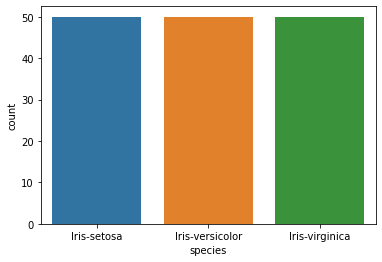

In [ ]:
sns.countplot(df['species'])

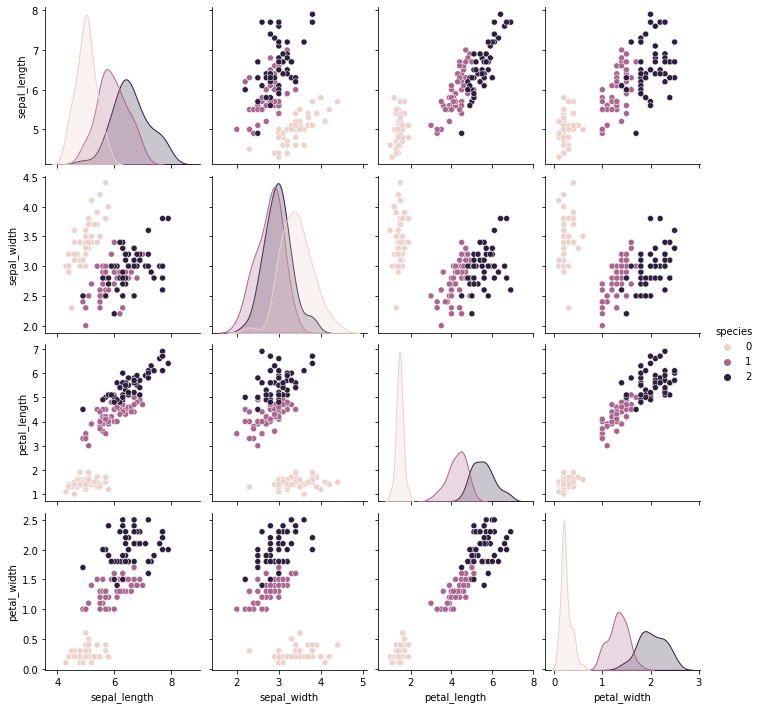

In [ ]:
sns.pairplot(df, hue="species")
plt.show()

**Observations:**
- Iris setosa can be distinguished from the other two species by oberserving any of the plots of **petal_length** or **petal_width**.

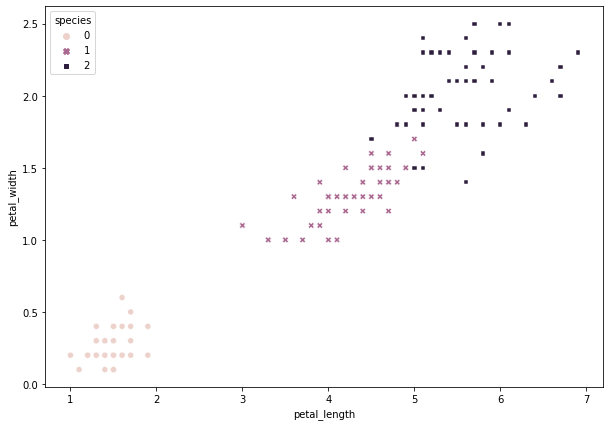

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species')
plt.show()

***Observation :***
- We can distinguish between 3 species based on **petal_length** and **petal_width**.

### Histogram Of Each Feature

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

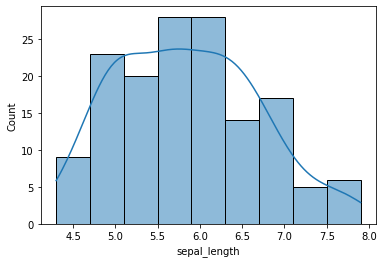

In [ ]:
sns.histplot(df['sepal_length'], kde = True)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

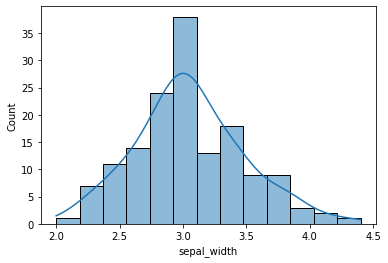

In [ ]:
sns.histplot(df['sepal_width'], kde = True)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

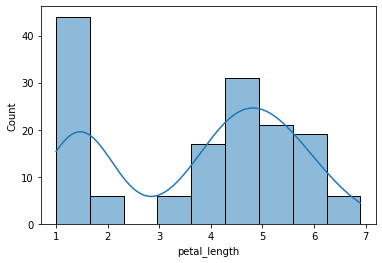

In [ ]:
sns.histplot(df['petal_length'], kde = True)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

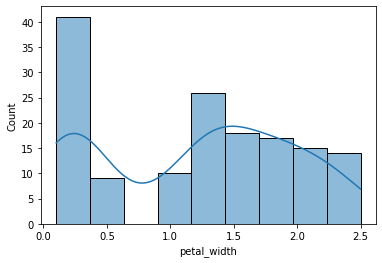

In [ ]:
sns.histplot(df['petal_width'], kde = True)

### BoxPlot For Each Feature

<AxesSubplot:xlabel='sepal_length'>

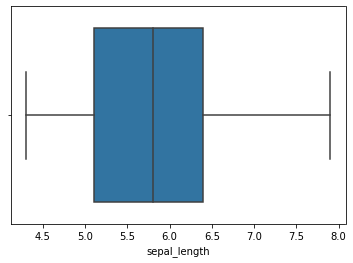

In [ ]:
sns.boxplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_width'>

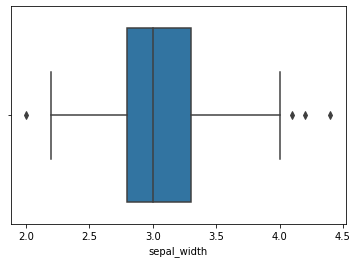

In [ ]:
sns.boxplot(df['sepal_width'])

<AxesSubplot:xlabel='petal_length'>

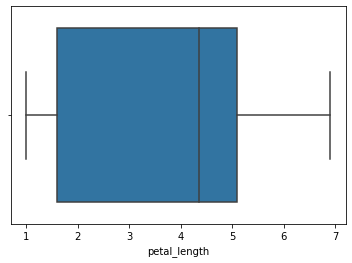

In [ ]:
sns.boxplot(df['petal_length'])

<AxesSubplot:xlabel='petal_width'>

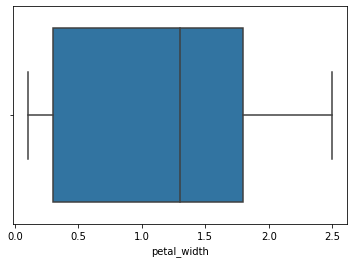

In [ ]:
sns.boxplot(df['petal_width'])

### Converting categorical data to numerical data

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
cat_cols = df.select_dtypes(['object']).columns

# output of factorize() is [labels, uniques] and we need labels.
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0]) 

# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Handling Outliers

In [ ]:
# interquartile range

result = stats.iqr(df['sepal_width'], axis = 0)
result

0.5

In [ ]:
df1 = df.copy()

df1.drop(df1[df1['sepal_width'] < (df1['sepal_width'].quantile(0.25) - 1.5 * result)].index, inplace = True)
df1.drop(df1[df1['sepal_width'] > (df1['sepal_width'].quantile(0.75) + 1.5 * result)].index, inplace = True)

In [ ]:
df1.shape

(146, 5)

<AxesSubplot:xlabel='sepal_width'>

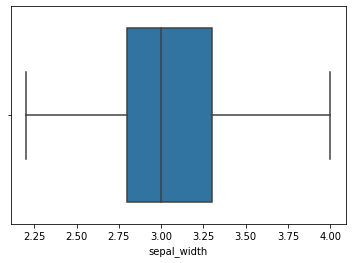

In [ ]:
sns.boxplot(df1['sepal_width'])